# Assignment 2 - Due Friday February 23rd, at 11:59pm

Your completed assignment should be saved in your Bitbucket mp248 repository in the file **Assignment.2/Assignment.2.ipynb**.   

**Do your work in a copy of this i-python notebook.**

**Ensure you label your code blocks** eg: (1)(a), (2)(b), (2)(b)continued, etc.

Please ensure you do not have a copy of the course repository inside your personal mp248 Bitbucket repository. This assignment uses many csv files (from the course repository).  **Do not include** these with your homework, and do not store them on your mp248 repository.  The issue here is that if you store large files in your mp248 repository it slows down the grading script substantially and makes it more difficult for us to give you timely feedback before the due date. In your code, just point to the location (outside of your personal repository) when you need them.


## Problem 1

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^2+1}{3z^2}$$

In this problem we ask you to use Sympy to find:

 (a) The points in the plane where Newton's method fails after 2 or 3 iterations. Notice that $N(z) = \frac{2z^2+1}{3z^2}$ which is well-defined as long as $z \neq 0$.  Thus Newton's method fails on one iteration only for $z=0$. Find both closed-form expressions for your answers as well as floating-point approximations. Print the approximations in your notebook. Use the Python casting technique **complex(z)** to convert the Sympy complex number **z** to a floating point approximation. In your notebook also count the number of points, i.e. write "The number of points where Newton's method fails after exactly two iterations is . . ."
 
 (b) The points in the plane where Newton's method is periodic of period 2 or 3.  A point is periodic of period 1 means $N(z) = z$.  Periodic of period 2 means $N(N(z))=z$ and $N(z) \neq z$.  Periodic of period 3 means $N(N(N(z))) = z$ while $N(z) \neq z$ and $N(N(z))\neq z$. 
 
 So for example, the points of period $1$ are the solution to the equation
 $$z = N(z) = z - \frac{z^3-1}{3z^2}$$
 which we can see are the roots of the original equation $z^3-1$. Similarly write-out the number of periodic points of period exactly 2, similarly for period 3.
 
 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook. 


In [77]:
import sympy as sp
sp.init_printing()
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [78]:
## Problem 1
##a)

z = sp.Symbol('z')

def Newton_fail_points(iterate):
    z = sp.Symbol('z')
    f = z**3 - 1
    N = z - f/f.diff(z)
    N = sp.simplify(N)
    N0 = N
    for i in range (1, iterate):
        N = N0.subs(z, N) #N(N(z))
    denom =  sp.fraction(N)[1] 
    denom = sp.simplify(denom)
    fails = sp.solve(denom)
    display(fails)
    
    cfails = [complex(fl) for fl in fails]
    print(cfails)
        
    print("The number of points where Newton's method fails is %d" \
          % (len(fails)))

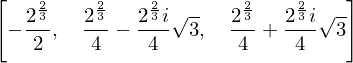

[(-0.7937005259840997+0j), (0.3968502629920499-0.6873648184993013j), (0.3968502629920499+0.6873648184993013j)]
The number of points where Newton's method fails is 3


[(-1.433775499273943+0j), (-0.5612610198315577-0.18361834892139395j), (-0.5612610198315577+0.18361834892139395j), (0.12161235514889676-0.5778754757887876j), (0.12161235514889676+0.5778754757887876j), (0.439648664682661-0.39425712686739367j), (0.439648664682661+0.39425712686739367j), (0.7168877496369715-1.2416860056949517j), (0.7168877496369715+1.2416860056949517j)]
The number of points where Newton's method fails is 9


In [79]:
##a)
Newton_fail_points(2)
Newton_fail_points(3)

In [80]:
##b)
def Newton_periodic_points(iterate):
    
    z = sp.Symbol('z')
    f = z**3 - 1
    N = z - f/f.diff(z)
    N = sp.simplify(N)
    N0 = N
    for i in range (1, iterate):
        N = N0.subs(z, N) #N(N(z))
    eq = sp.Eq(0, N - z)
    sol = sp.solve(eq)
    display(sol)
    
    csol = [complex(fl) for fl in sol]
    print(csol)
        
    print("The number of points where Newton's method is periodic of period %d is %d" \
          % (iterate, len(sol)))

[(1+0j), (-0.5-0.8660254037844386j), (-0.5+0.8660254037844386j), (-0.630614017753609-0.2578465512158904j), (-0.630614017753609+0.2578465512158904j), (0.09200534524563808-0.6750510349651416j), (0.09200534524563808+0.6750510349651416j), (0.538608672507971-0.4172044837492512j), (0.538608672507971+0.4172044837492512j)]
The number of points where Newton's method is periodic of period 2 is 9


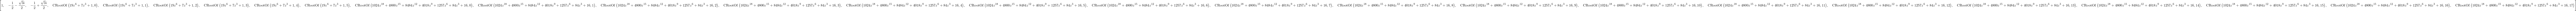

[(1+0j), (-0.5-0.8660254037844386j), (-0.5+0.8660254037844386j), (-0.5983578868038159-0.12932136746874948j), (-0.5983578868038159+0.12932136746874948j), (0.1871833539218284-0.5828538142612528j), (0.1871833539218284+0.5828538142612528j), (0.41117453288198746-0.4535324467925033j), (0.41117453288198746+0.4535324467925033j), (-1.322853393850782-0.24174515645857594j), (-1.322853393850782+0.24174515645857594j), (-0.7094890359805932-0.22635598819502067j), (-0.7094890359805932+0.22635598819502067j), (-0.4406150477401136-0.23478310809223005j), (-0.4406150477401136+0.23478310809223005j), (0.01697938788271779-0.49897537867874664j), (0.01697938788271779+0.49897537867874664j), (0.4520692501904205-1.2664972227865265j), (0.4520692501904205+1.2664972227865265j), (0.15871448191467816-0.7276135229632357j), (0.15871448191467816+0.7276135229632357j), (0.4236356598573959-0.2641922705865166j), (0.4236356598573959+0.2641922705865166j), (0.550774554065915-0.501257534768215j), (0.550774554065915+0.501257534768

In [81]:
##b)
Newton_periodic_points(2)
Newton_periodic_points(3)

In [82]:
##c)

##same function as above but this time without print statements

def PlotNewtonFailPoints(iterate):  
    z = sp.Symbol('z')
    f = z**3 - 1
    N = z - f/f.diff(z)
    N = sp.simplify(N)
    N0 = N
    for i in range (1, iterate):
        N = N0.subs(z, N) #N(N(z))
    denom =  sp.fraction(N)[1] 
    denom = sp.simplify(denom)
    fails = sp.solve(denom)
    cfails = [complex(fl) for fl in fails]
    
    return(cfails)


In [83]:
##c)
def PlotNewtonPeriodicPoints(iterate):
    
    z = sp.Symbol('z')
    f = z**3 - 1
    N = z - f/f.diff(z)
    N = sp.simplify(N)
    N0 = N
    for i in range (1, iterate):
        N = N0.subs(z, N) #N(N(z))
    eq = sp.Eq(0, N - z)
    sol = sp.solve(eq)
    csol = [complex(fl) for fl in sol]

    return(csol)

In [84]:
##c)

## f = sympy function of x
## z = sympy initialized variable name
## roots == list of roots of f
## rootcol == a numby array (a list of RGB values, one for each root)
## RMIN == smallest real value
## RMAX == biggest real value
## IMIN == smallest imaginary value
## IMAX == biggest imagniary value
## xres == number of pixels in the x direction
## yres == number of pixels in the y direction


def basinplot(f, z, roots, rootcol, RMIN, RMAX, IMIN, IMAX, xres, yres):
    
    N = z-f/f.diff(z)
    DF = sp.lambdify(z, f.diff(z), "mpmath")
    IT = sp.lambdify(z, N, "mpmath")
    
    IM = np.ndarray(shape=(yres,xres,3),dtype=float)
    
    for i in range(xres):
        for j in range(yres):
            z0 = (i/xres)*(RMAX-RMIN)+RMIN + ((j/yres)*(IMAX-IMIN)+IMIN)*1j
            z1 = z0
            DEV = 1.0
            while DEV > 0.1:
                if abs(DF(z0))<0.0001:
                    DEV = 0
                else:
                    z1 = IT(z0)
                    DEV = abs(z1-z0)
                    z0 = z1
            rootFound = False
            for k in range(len(roots)):
                if abs(roots[k]-z0)<0.2:
                    rootFound = True
                    IM[j, i] = rootcol[k]
            if rootFound == False:
                IM[j, i] = np.array([0.0,0.0,0.0])
    #plt.close()
    plt.imshow(IM, extent = [RMIN, RMAX, IMIN, IMAX])
   # plt.show()

In [98]:
##c)
roots = sp.solve(z**3 - 1)
#sp.pprint(roots)

xfails1 = np.real(PlotNewtonFailPoints(1))
yfails1 = np.imag(PlotNewtonFailPoints(1))
xfails2 = np.real(PlotNewtonFailPoints(2))
yfails2 = np.imag(PlotNewtonFailPoints(2))
xfails3 = np.real(PlotNewtonFailPoints(3))
yfails3 = np.imag(PlotNewtonFailPoints(3))

xper1 = np.real(PlotNewtonPeriodicPoints(1))
yper1 = np.imag(PlotNewtonPeriodicPoints(1))
xper2 = np.real(PlotNewtonPeriodicPoints(2))
yper2 = np.imag(PlotNewtonPeriodicPoints(2))
xper3 = np.real(PlotNewtonPeriodicPoints(3))
yper3 = np.imag(PlotNewtonPeriodicPoints(3))

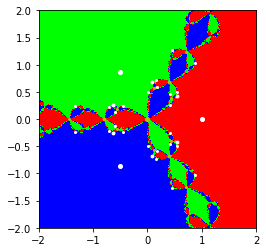

In [106]:
basinplot(z**3 - 1, z, [r.evalf() for r in roots], \
          np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]), \
          -2.0, 2.0, -2.0, 2.0, 800, 800)

plt.scatter(xfails1, yfails1, s=16, c='y')
plt.scatter(xfails2, yfails2, s=8, c='y')
plt.scatter(xfails3, yfails3, s=4, c='y')
plt.scatter(xper1, yper1, 16, c='w')
plt.scatter(xper2, yper2, 8, c='w')
plt.scatter(xper3, yper3, 4, c='w')





## Problem 2

In this problem we ask to you extend the code from **Part.II/Data.1.filled.ipynb**. As in class, load and parse the files in the **w.sask** and **w.vic** subdirectories to create the variable **mList**.  For this problem use the data from **mList**.

(a) Make a plot of daily precipitation, comparing two cities.  Make the plot for Saskatoon vs. Victoria.  On the x-axis you will have the daily precipitation for Victoria.  On the y-axis you will have the daily precipitation for Saskatoon.  Only plot dates where (in mList) we have precipitation data for both cities.  In particular, once you have combed through the data to find the precipitation data for the common dates, print a line in your python notebook of the form "Common data: n" where n is the number of days where we have precipitation data for both Victoria and Saskatoon.  

(b) Make a similar daily plot of mean temperatures of Victoria vs. Saskatoon.  Include the linear least squares interpolation in your plot. 

In [67]:
## Problem 2
import datetime as dt
import os as os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('../../physmath248-2018/Part.II/'), "w.*")
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir('../../physmath248-2018/Part.II/' + wd), "eng-daily*.csv")
    for wdf in files:
        with open('../../physmath248-2018/Part.II/'+wd+'/'+wdf, encoding='utf-8') as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)      
            
## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

## run through the weather station data, replace the date record with a datetime object
for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))

## now let's check for gaps.  We run through the weather station date and check the next day 
## is the previous day + one day.  If not, we start a new interval. 
print("Data intervals: ")
for WS in mList:
    print(WS['Station Name'], end=" ")
    ## find maximal consecutive date interval in data, then move on.
    i0 = 0 ## start interval
    i1 = 0 ## end interval
    ## if date interval [i0,i1] can be expanded to be consecutive, do it.
    ## if not, and if i1 not end of list, move to [i1+1,i1+1] and repeat
    while i1+1 != len(WS['Data']):
        ## if we can increment i1 and keep [i0,i1] consecutive, do it.
        if WS['Data'][i1+1]["Date/Time"]-WS['Data'][i0]["Date/Time"] != dt.timedelta(1+i1-i0):
            ## not consecutive. Move on.
            print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date(), "/ ", end='')
            i0 = i1+1
            i1 = i1+1
        else:
            i1 = i1+1
    print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date()) 
    


Weather subdirectories: ['w.sask', 'w.vic']
Station names: {"VICTORIA INT'L A", 'VICTORIA INTL A', "SASKATOON DIEFENBAKER INT'L A", 'SASKATOON SRC'}
Data intervals: 
VICTORIA INTL A 2013-07-11 -- 2013-09-02 / 2013-09-04 -- 2013-09-12 / 2013-09-15 -- 2013-09-16 / 2013-09-18 -- 2013-10-17 / 2013-10-20 -- 2013-10-24 / 2013-10-26 -- 2014-01-17 / 2014-01-19 -- 2014-10-16 / 2014-10-18 -- 2014-11-07 / 2014-11-09 -- 2014-11-20 / 2014-11-22 -- 2015-01-12 / 2015-01-15 -- 2015-06-13 / 2015-06-15 -- 2015-06-21 / 2015-06-23 -- 2015-07-03 / 2015-07-05 -- 2015-08-18 / 2015-08-20 -- 2015-10-26 / 2015-10-28 -- 2015-11-01 / 2015-11-03 -- 2015-11-30 / 2015-12-02 -- 2015-12-08 / 2015-12-10 -- 2015-12-23 / 2015-12-25 -- 2016-02-15 / 2016-02-17 -- 2016-03-18 / 2016-03-20 -- 2016-04-02 / 2016-04-04 -- 2016-05-04 / 2016-05-06 -- 2016-06-01 / 2016-06-03 -- 2016-06-22 / 2016-06-24 -- 2016-07-24 / 2016-07-27 -- 2016-10-08 / 2016-10-10 -- 2016-10-10 / 2016-10-12 -- 2017-05-21 / 2017-05-23 -- 2017-05-26 / 2017-05-

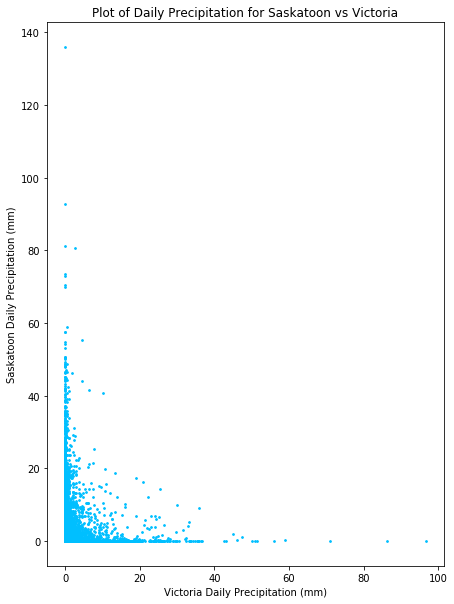

In [92]:
VicTotPrecip = []
SaskTotPrecip = []

VicTotPrecip1 = [x[ 'Total Precip (mm)']for x in mList[1]['Data']]
VicTotPrecip2 = [x[ 'Total Precip (mm)']for x in mList[2]['Data']]
VicTotPrecip = VicTotPrecip1 + VicTotPrecip2

SaskTotPrecip1 = [x[ 'Total Precip (mm)']for x in mList[0]['Data']]
SaskTotPrecip2 = [x[ 'Total Precip (mm)']for x in mList[3]['Data']]
SaskTotPrecip = SaskTotPrecip1 + SaskTotPrecip2

VicDateTime1 = [x[ 'Date/Time']for x in mList[1]['Data']]
VicDateTime2 = [x[ 'Date/Time']for x in mList[2]['Data']]
VicDateTime = VicDateTime1 + VicDateTime2

SaskDateTime1 = [x[ 'Date/Time']for x in mList[0]['Data']]
SaskDateTime2 = [x[ 'Date/Time']for x in mList[3]['Data']]
SaskDateTime = SaskDateTime1 + SaskDateTime2

PlotDataVic = []
PlotDataSask = []

for i in range(len(VicDateTime)):
    for j in range(len(SaskDateTime)):
        if VicDateTime[i]-SaskDateTime[j]==dt.timedelta(0):
            PlotDataVic.append(VicTotPrecip[i])
            PlotDataSask.append(SaskTotPrecip[j])
            break
            
xw = max(VicTotPrecip)-min(VicTotPrecip)
yw = max(SaskTotPrecip)-min(SaskTotPrecip)
scl = max([xw, yw])

plt.figure(figsize = (10*yw/scl, 10*xw/scl))
plt.scatter(PlotDataSask, PlotDataVic, c = 'deepskyblue', s=3)
plt.title('Plot of Daily Precipitation for Saskatoon vs Victoria')
plt.xlabel('Victoria Daily Precipitation (mm)')
plt.ylabel('Saskatoon Daily Precipitation (mm)')

plt.show()

In [102]:
##b)
plt.close()

VicMean1 = [x[ 'Mean Temp (°C)']for x in mList[1]['Data']]
VicMean2 = [x[ 'Mean Temp (°C)']for x in mList[2]['Data']]
VicMean = VicMean1 + VicMean2

SaskMean1 = [x[ 'Mean Temp (°C)']for x in mList[0]['Data']]
SaskMean2 = [x[ 'Mean Temp (°C)']for x in mList[3]['Data']]
SaskMean = SaskMean1 + SaskMean2

PlotMeanVic = []
PlotMeanSask = []

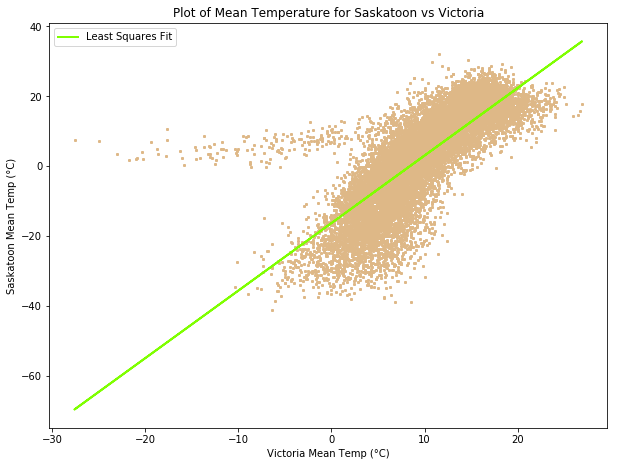

Least Squares Coefficients: 1.930484, -16.219352


In [105]:
for i in range(len(VicDateTime)):
    for j in range(len(SaskDateTime)):
        if VicDateTime[i]-SaskDateTime[j]==dt.timedelta(0):
            PlotMeanVic.append(VicMean[i])
            PlotMeanSask.append(SaskMean[j])
            break
            
xw = max(VicMean)-min(VicMean)
yw = max(SaskMean)-min(SaskMean)
scl = max([xw, yw])

plt.figure(figsize = (10*yw/scl, 10*xw/scl))
plt.scatter(PlotMeanVic, PlotMeanSask, c = 'burlywood', s=3)
plt.title('Plot of Mean Temperature for Saskatoon vs Victoria')
plt.xlabel('Victoria Mean Temp (°C)')
plt.ylabel('Saskatoon Mean Temp (°C)')

a,b = np.polyfit(PlotMeanVic, PlotMeanSask, deg=1)
linearfit=a*(np.array(PlotMeanVic))+b
plt.plot(PlotMeanVic,linearfit, c='chartreuse', label='Least Squares Fit', linewidth=2.0)
plt.legend()

plt.show()
print("Least Squares Coefficients: %f, %f" % (a, b))

## Problem 3

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a list, $L$, where the $k$-th element of the list is the number of times it takes to turn $k+1$ into $1$ by applying the function $f$.  

Now consider the function $T(k) = L[0] + L[1] + \cdots + L[k-1]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for a linear and quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?  

In [18]:
## Problem 3
def f(n):
    if n%2 == 0: return n//2
    else: return 3*n+1

In [19]:
def OddEvenList(k):
    L = []
    T = [0]
    for n in range(k):
        i = n+1
        count = 0
        while i != 1:
            i = f(i)
            count += 1
        L += [count]
        T += [T[-1]+count]

    x = np.linspace(0, k, num=k+1) ## a list of integers from 0 to k
    xy = [x, T] ## a list of x and y values to be passed into a polyfit
    return(xy)

In [60]:
def LinearFit(x, T):
    p = np.polyfit(x, T, 1)
    linearfit = np.polyval(p,x)
    print('The coefficients of the least squares linear fit are %f and %f'\
          % (p[0], p[1]))
    print(p)
    plt.close()
    
    plt.plot(T)
    plt.plot(linearfit)
    plt.xlabel('k')
    plt.ylabel('T(k)')
    plt.title('Least Squares Linear Fit')
    plt.show()
    print('The linear fit appears to diverge from the data')
    print(' \n **************************************** \n ')

def QuadFit(x, T):
    p = np.polyfit(x, T, 2)
    quadfit = np.polyval(p,x)
    print('The coefficients of the least squares quadratic fit are %f, %f and %f'\
          % (p[0], p[1], p[2]))
    
    print(p)
    plt.close()
    plt.plot(T)
    plt.plot(quadfit)
    plt.xlabel('k')
    plt.ylabel('T(k)')
    plt.title('Least Squares Quadratic Fit')
    plt.show()
    print('The quadratic fit appears to converge with the data')
    print('\n **************************************** \n ')
    
    


The coefficients of the least squares linear fit are 86.689358 and -36235.859277
[    86.68935784 -36235.85927736]


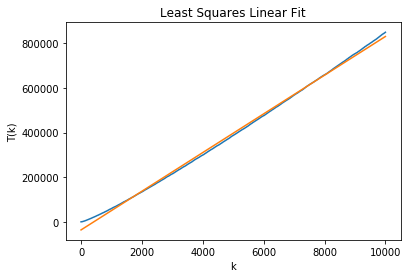

The linear fit appears to diverge from the data
 
 **************************************** 
 
The coefficients of the least squares quadratic fit are 0.001333, 73.360910 and -14024.000823
[ 1.33284479e-03  7.33609099e+01 -1.40240008e+04]


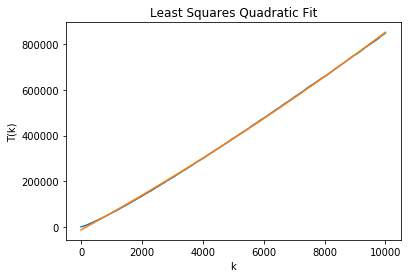

The quadratic fit appears to converge with the data

 **************************************** 
 
The coefficients of the least squares linear fit are 109.122636 and -332408.597930
[ 1.09122636e+02 -3.32408598e+05]


The linear fit appears to diverge from the data
 
 **************************************** 
 
The coefficients of the least squares quadratic fit are 0.000127, 96.374623 and -119943.835532
[ 1.27480132e-04  9.63746226e+01 -1.19943836e+05]


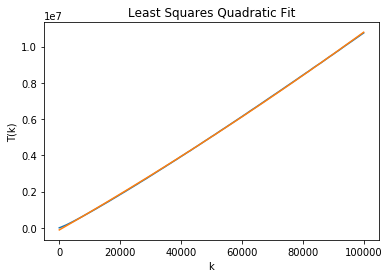

The quadratic fit appears to converge with the data

 **************************************** 
 


In [61]:
k = 10000
LinearFit(OddEvenList(k)[0], OddEvenList(k)[1])
QuadFit(OddEvenList(k)[0], OddEvenList(k)[1])

k = k*10
LinearFit(OddEvenList(k)[0], OddEvenList(k)[1])
QuadFit(OddEvenList(k)[0], OddEvenList(k)[1])
